In [36]:
from IPython.display import Image
import scipy
from scipy import fftpack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pp
from scipy import integrate, optimize
from scipy.integrate import odeint
from random import random
import math
from scipy.interpolate import interp1d

In [2]:
# defining two populations

x1 = 1000
y1 = 0
z1 = 0
n1 = x1+y1+z1

x2 = 990
y2 = 10
z2 = 0
n2 = x2+y2+z2

inf_1 = []
sub_1 = []
rec_1 = []

inf_2 = []
sub_2 = []
rec_2 = []

beta = 1
gamma = 0.3
rho1 = 1
rho2 = 1
rho12 = 0.001

rates_1 = [gamma*y1, beta*x1/n1*(rho1*y1 + rho12*y2)]
rates_2 = [gamma*y2, beta*x2/n2*(rho2*y2 + rho12*y1)]

tot_rate_1 = sum(rates_1)
tot_rate_2 = sum(rates_2)

t = 0
T = []


while  t<40:
    
    rates_1 = [gamma*y1, beta*x1/n1*(rho1*y1 + rho12*y2)]
    rates_2 = [gamma*y2, beta*x2/n2*(rho2*y2 + rho12*y1)]
    tot_rate = rates_1 + rates_2
    
    if sum(tot_rate) == 0:
        break
    else:
        dt = - math.log(random()) / sum(tot_rate)
        t += dt
        T.append(t) 



        #what's the next event in population1?
        P1 = random() * sum(tot_rate)

        if P1 < tot_rate[0]: # recovered
            z1 += 1
            y1 -= 1 
            x1 = x1
        elif P1 < sum(tot_rate[:2]) and x2 > 0: # infected
            y1 += 1
            x1 -= 1
            z1 = z1
        elif P1 < sum(tot_rate[:3]) and y2 > 0: # recovered
            z2 += 1
            y2 -= 1 
            x2 = x2
        elif P1 < sum(tot_rate[:4]) and x2 > 0: # infected
            y2 += 1
            x2 -= 1
            z2 = z2
        else:
            y2 = y2
            x2 = y2
            z2 = z2


        inf_1.append(y1)
        rec_1.append(z1)
        sub_1.append(x1)

        inf_2.append(y2)
        rec_2.append(z2)
        sub_2.append(x2)
        
plt.plot(T,inf_1)
plt.plot(T,inf_2)
plt.show()

NameError: name 'math' is not defined

In [54]:
def sirMetaPop(y,x,beta,gamma,rho12,N):
    x1 = -(beta/N)*y[0]*(y[1]+rho12*y[3])
    y1 = -gamma*y[1] + (beta/N)*y[0]*(y[1]+rho12*y[3])
    x2 = -(beta/N)*y[2]*(y[3]+rho12*y[1])
    y2 = -gamma*y[3] + (beta/N)*y[2]*(y[3]+rho12*y[1])
    return x1,y1,x2,y2

In [55]:
t = np.linspace(0,50,1000)
sol1 = odeint(sirMetaPop,[1000,0,990,10],t,(1,0.3,0.001,1000))

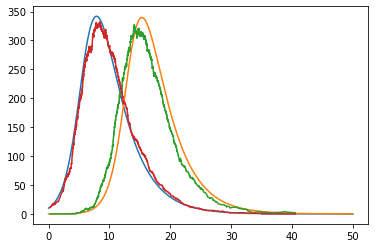

In [56]:
I2 = sol1[:, 3]
I1 = sol1[:, 1]
plt.plot(t,I2,label="S(t)")
plt.plot(t,I1,label="I(t)")
plt.plot(T,inf_1)
plt.plot(T,inf_2)
plt.show()